In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [3]:
q0 = [1., 0., 0., 0., 0., 0., 0.025]
v0 = [0., 0., 0., 0.5, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#1) (generic function with 1 method)

In [5]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts
elapsed time: 424.884384437 seconds
elapsed time: 0.848276158 seconds
elapsed time: 0.914908146 seconds
Restoration_Failed
elapsed time: 0.803211717 seconds
elapsed time: 0.759691019 seconds
elapsed time: 0.762345457 seconds
Restoration_Failed
elapsed time: 0.964716201 seconds
elapsed time: 0.854720286 seconds
elapsed time: 0.948869803 seconds
Restoration_Failed
elapsed time: 0.830251994 seconds
elapsed time: 0.793953477 seconds
elapsed time: 0.778067409 seconds
Restoration_Failed
elapsed time: 0.77557426 seconds
elapsed time: 0.780853618 seconds
elapsed time: 0.778393229 seconds
Restoration_Failed


In [4]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
elapsed time: 38.374960405 seconds
elapsed time: 0.007038524 seconds

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

elapsed time: 0.00671496 seconds
elapsed time: 0.006323084 seconds
elapsed time: 0.021520691 seconds
elapsed time: 0.006994048 seconds
elapsed time: 0.006133548 seconds
elapsed time: 0.006240466 seconds
elapsed time: 0.006560327 seconds
elapsed time: 0.006294152 seconds
elapsed time: 0.008064251 seconds
elapsed time: 0.007581456 seconds
elapsed time: 0.007431864 seconds
elapsed time: 0.006679817 seconds
elapsed time: 0.006432177 seconds
elapsed time: 0.006294968 seconds
elapsed time: 0.00668324 seconds
elapsed time: 0.0

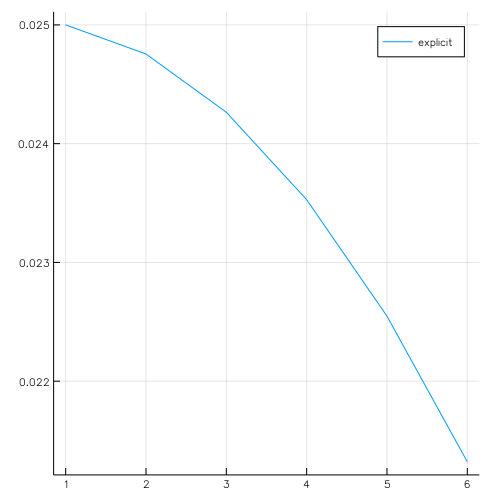

In [6]:
ts = cumsum([Δt for i in 1:N]);
j = 7
plot(traj_exp[j,:],label="explicit")
# plot!(traj_imp[j,:],label="implicit")

In [7]:
traj_imp

19×6 Array{Float64,2}:
 1.0    1.0    1.0    1.0    1.0    1.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.025  0.025  0.025  0.025  0.025  0.025
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.5    0.5    0.5    0.5    0.5    0.5  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  
 0.0    0.0    0.0    0.0    0.0    0.0  

In [ ]:
maximum(traj_exp)